In [1]:
from langgraph.constants import START
from langgraph.graph import MessagesState, StateGraph

def node1_1(state: MessagesState):
    return {"messages": ["some response"]}

def node1_2(state: MessagesState):
    return {"messages": ["some response"]}

def node2_1(state: MessagesState):
    return {"messages": ["some response"]}

def node2_2(state: MessagesState):
    return {"messages": ["some response"]}

def common_node(state: MessagesState):
    return {"messages": ["some response"]}

In [2]:
from langgraph.graph import END, START
from langgraph.graph import MessagesState, StateGraph

sub_graph_1 = StateGraph(MessagesState)
sub_graph_1.add_node("Node-1_1", node1_1)
sub_graph_1.add_node("Node-1_2", node1_2)

sub_graph_1.add_edge(START, "Node-1_1")
sub_graph_1.add_edge("Node-1_1", "Node-1_2")
sub_graph_1.add_edge("Node-1_2", END)

sub_workflow_1 = sub_graph_1.compile()

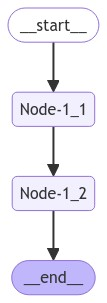

In [3]:
from IPython.display import Image, display

try:
    display(Image(sub_workflow_1.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [4]:
from langgraph.graph import END, START
from langgraph.graph import MessagesState, StateGraph

sub_graph_2 = StateGraph(MessagesState)
sub_graph_2.add_node("Node-2_1", node2_1)
sub_graph_2.add_node("Node-2_2", node2_2)
sub_graph_2.add_edge(START, "Node-2_1")
sub_graph_2.add_edge("Node-2_1", "Node-2_2")
sub_graph_2.add_edge("Node-2_2", END)

sub_workflow_2 = sub_graph_2.compile()

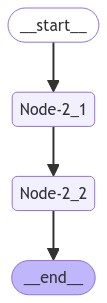

In [5]:
from IPython.display import Image, display

try:
    display(Image(sub_workflow_2.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass

In [6]:
from langgraph.graph import END, START

main_graph = StateGraph(MessagesState)

main_graph.add_node("common_node", common_node)
main_graph.add_node("sub_graph_1", sub_graph_1.compile())
main_graph.add_node("sub_graph_2", sub_graph_2.compile())

main_graph.add_edge(START, "common_node")
main_graph.add_edge("common_node", "sub_graph_1")
main_graph.add_edge("common_node", "sub_graph_2")
main_graph.add_edge("sub_graph_1", END)
main_graph.add_edge("sub_graph_2", END)
main_work_flow = main_graph.compile()

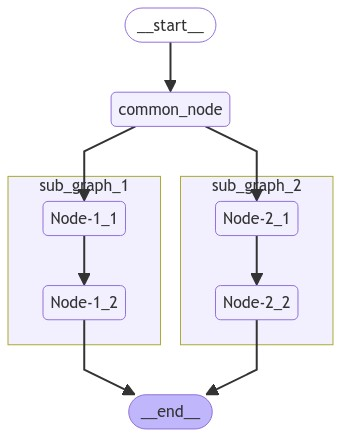

In [7]:
from IPython.display import Image, display

try:
    display(Image(main_work_flow.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    pass